<a href="https://colab.research.google.com/github/bzhenka/The-k-nearest-neighbors-algorithm/blob/main/The%20k-nearest%20neighbors%20algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод k-ближайших соседей

### импорты и датасет о вине

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WineDataset.csv to WineDataset.csv


In [ ]:
df = pd.read_csv('WineDataset.csv')

In [ ]:
df

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,3
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,3
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,3
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,3


## Предварительная обработка данных

### обработка отсутствующих значений

проверка на пропущенные значения

In [ ]:
df.isnull().sum()

,0
Alcohol,0
Malic Acid,0
Ash,0
Alcalinity of ash,0
Magnesium,0
Total phenols,0
Flavanoids,0
Nonflavanoid phenols,0
Proanthocyanins,0
Color intensity,0


Заполнение пропущенных значений средним значением по колонкам

In [ ]:
df.fillna(df.mean(), inplace=True)

### Кодирование категориальных признаков

Под категориальными данными мы понимаем данные, которые не имеют численного представления, они могут иметь как и два уникальных значения (бинарные признаки), так и более.

In [ ]:
df = pd.get_dummies(df, drop_first=True)

### Масштабирование признаков

z=(x−μ)/σ

x — исходное значение признака.
μ — среднее значение признака (математическое ожидание).
σ — стандартное отклонение признака (показывает разброс значений относительно среднего).
z — стандартизированное значение (так называемая
z-оценка).

In [ ]:
df = df.apply(lambda x: (x - x.mean()) / x.std() if np.issubdtype(x.dtype, np.number) else x)

In [ ]:
df.head()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,-1.210529
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526,-1.210529
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224,-1.210529
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007,-1.210529
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,-1.210529


In [ ]:
class_counts = df['Wine'].value_counts()
print(class_counts)

# Проверка процента объектов каждого класса
class_distribution = df['Wine'].value_counts(normalize=True) * 100
print(class_distribution)

Wine
 0.079735    71
-1.210529    59
 1.370000    48
Name: count, dtype: int64
Wine
 0.079735    39.887640
-1.210529    33.146067
 1.370000    26.966292
Name: proportion, dtype: float64


## Статистика по датасету и визуализация

### Статистика по данным

In [ ]:
stats = df.describe(percentiles=[0.25, 0.5, 0.75]).T  # Добавляем квартильные значения
stats['count'] = df.count()
stats['mean'] = df.mean()
stats['std'] = df.std()
stats['min'] = df.min()
stats['max'] = df.max()

print(stats)

                              count          mean  std       min       25%  \
Alcohol                         178 -8.781989e-16  1.0 -2.427388 -0.786027   
Malic Acid                      178  0.000000e+00  1.0 -1.428952 -0.656896   
Ash                             178 -7.996101e-16  1.0 -3.668813 -0.570513   
Alcalinity of ash               178 -7.983626e-17  1.0 -2.663505 -0.687199   
Magnesium                       178  1.995907e-17  1.0 -2.082381 -0.822096   
Total phenols                   178  0.000000e+00  1.0 -2.101318 -0.882977   
Flavanoids                      178 -3.193450e-16  1.0 -1.691200 -0.825211   
Nonflavanoid phenols            178  3.592632e-16  1.0 -1.862979 -0.738059   
Proanthocyanins                 178 -1.397135e-16  1.0 -2.063214 -0.595603   
Color intensity                 178  1.995907e-17  1.0 -1.629691 -0.792866   
Hue                             178  1.995907e-16  1.0 -2.088840 -0.765403   
OD280/OD315 of diluted wines    178  3.193450e-16  1.0 -1.889723

### Графическая визуализация статистики

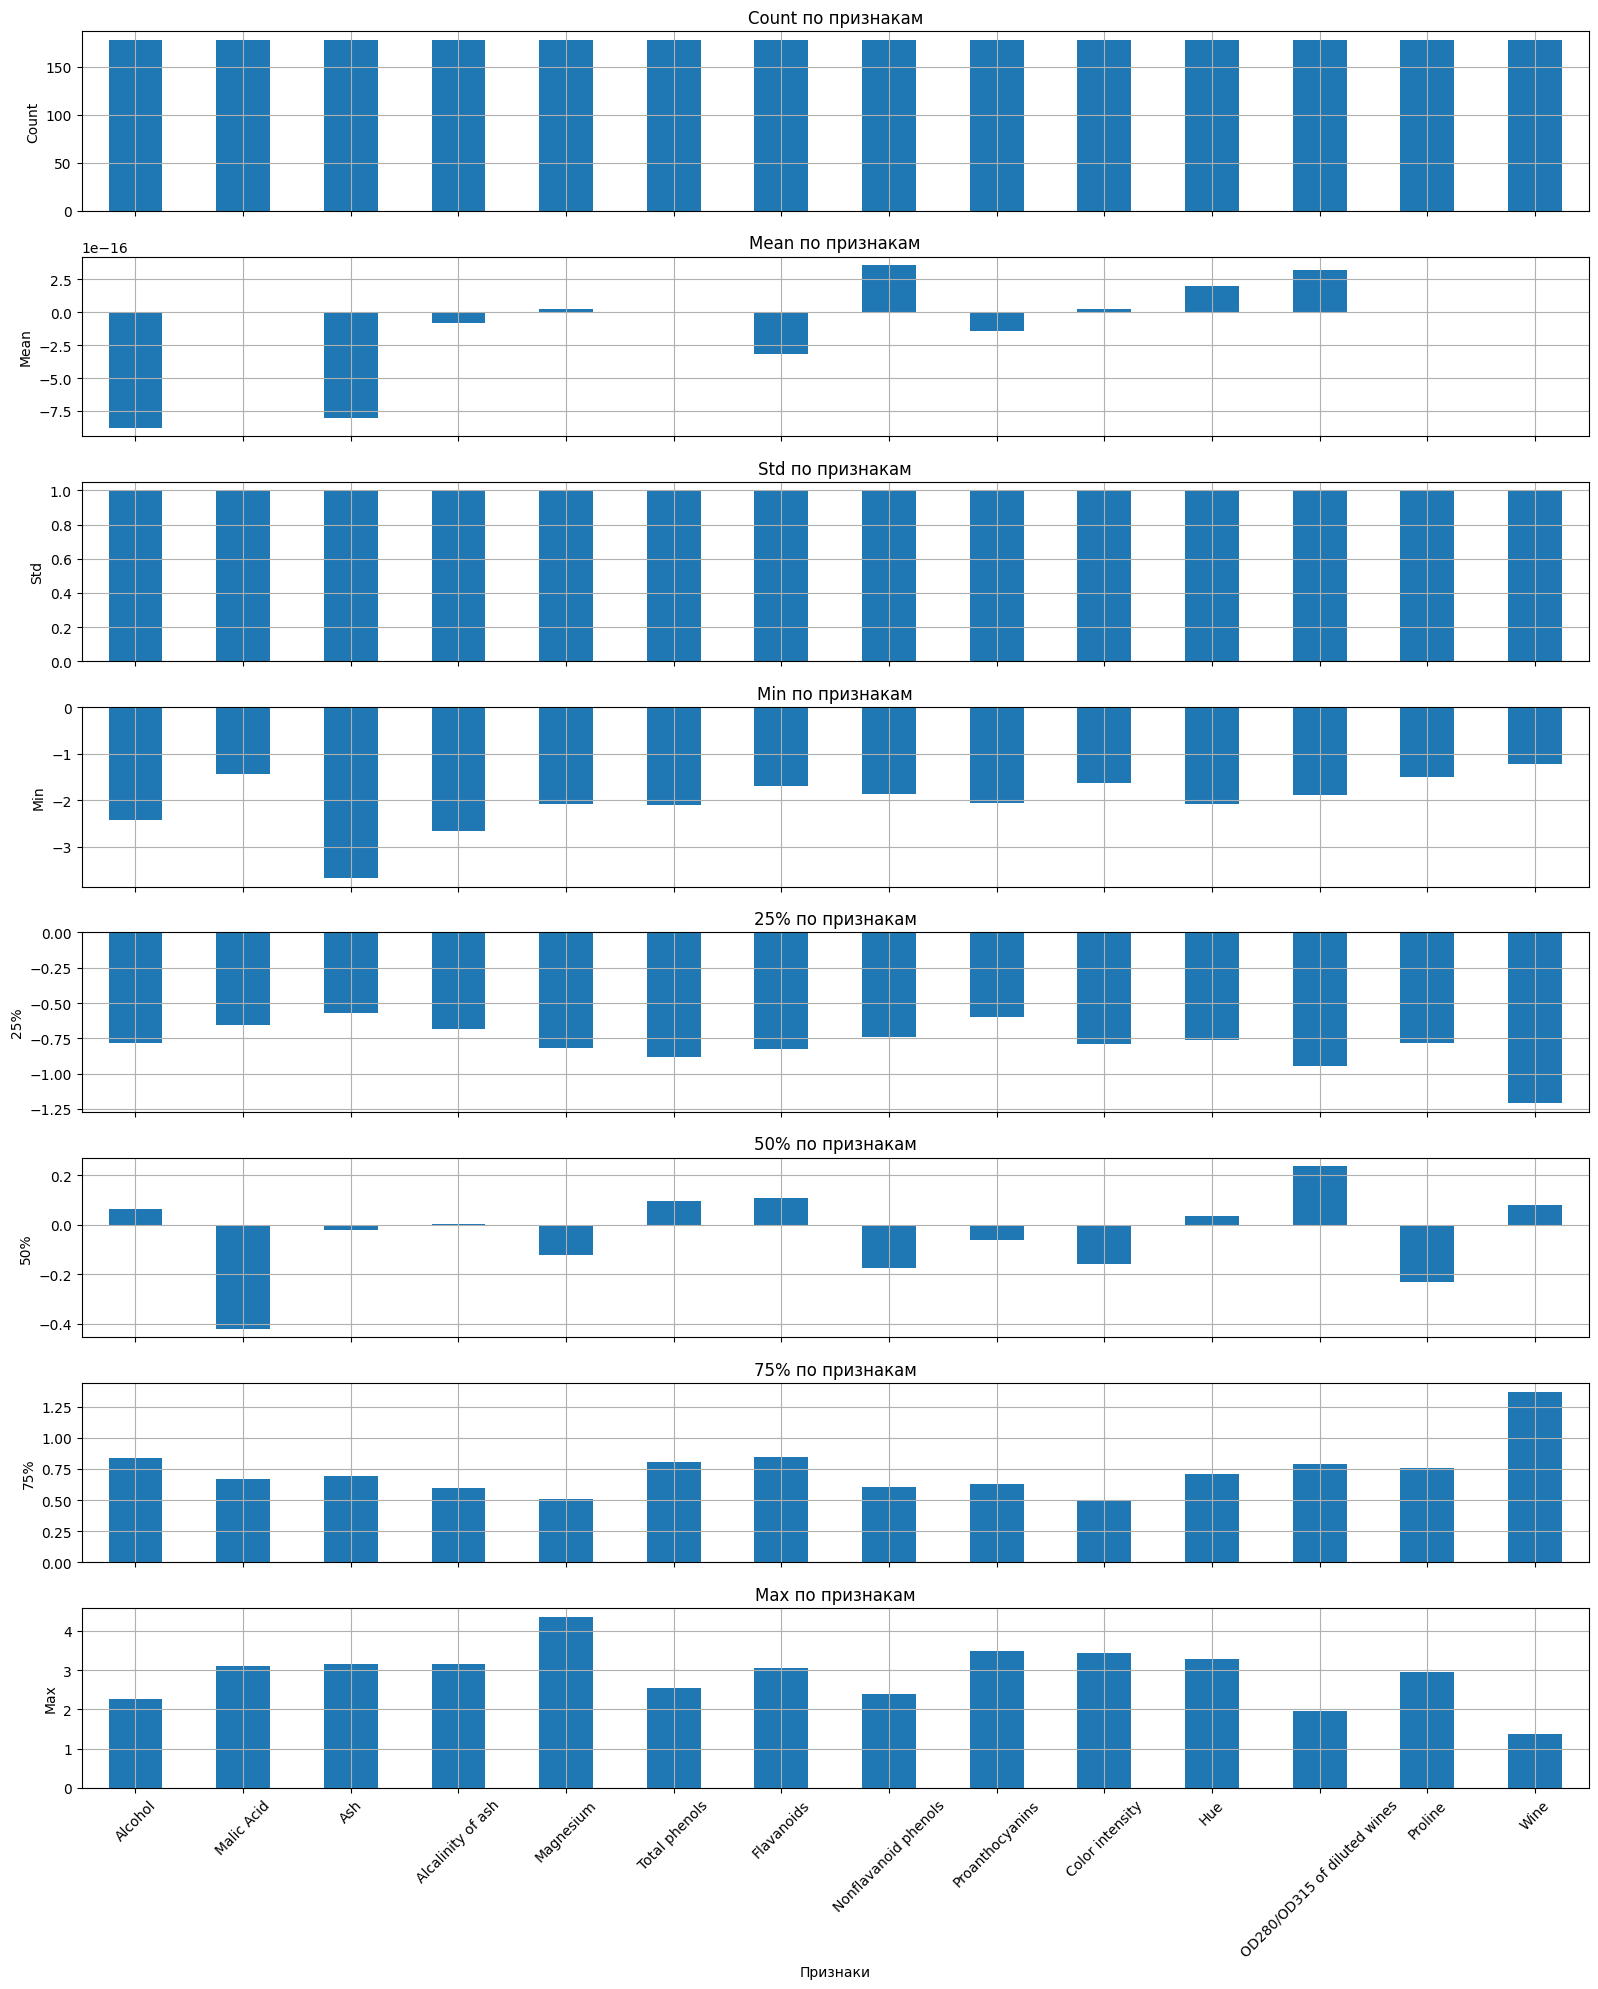

In [ ]:
key_metrics = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

fig, axes = plt.subplots(len(key_metrics), 1, figsize=(16, 20), sharex=True)

for i, metric in enumerate(key_metrics):
    stats[metric].plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} по признакам')
    axes[i].grid(True)
    axes[i].set_ylabel(metric.capitalize())

plt.xlabel('Признаки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

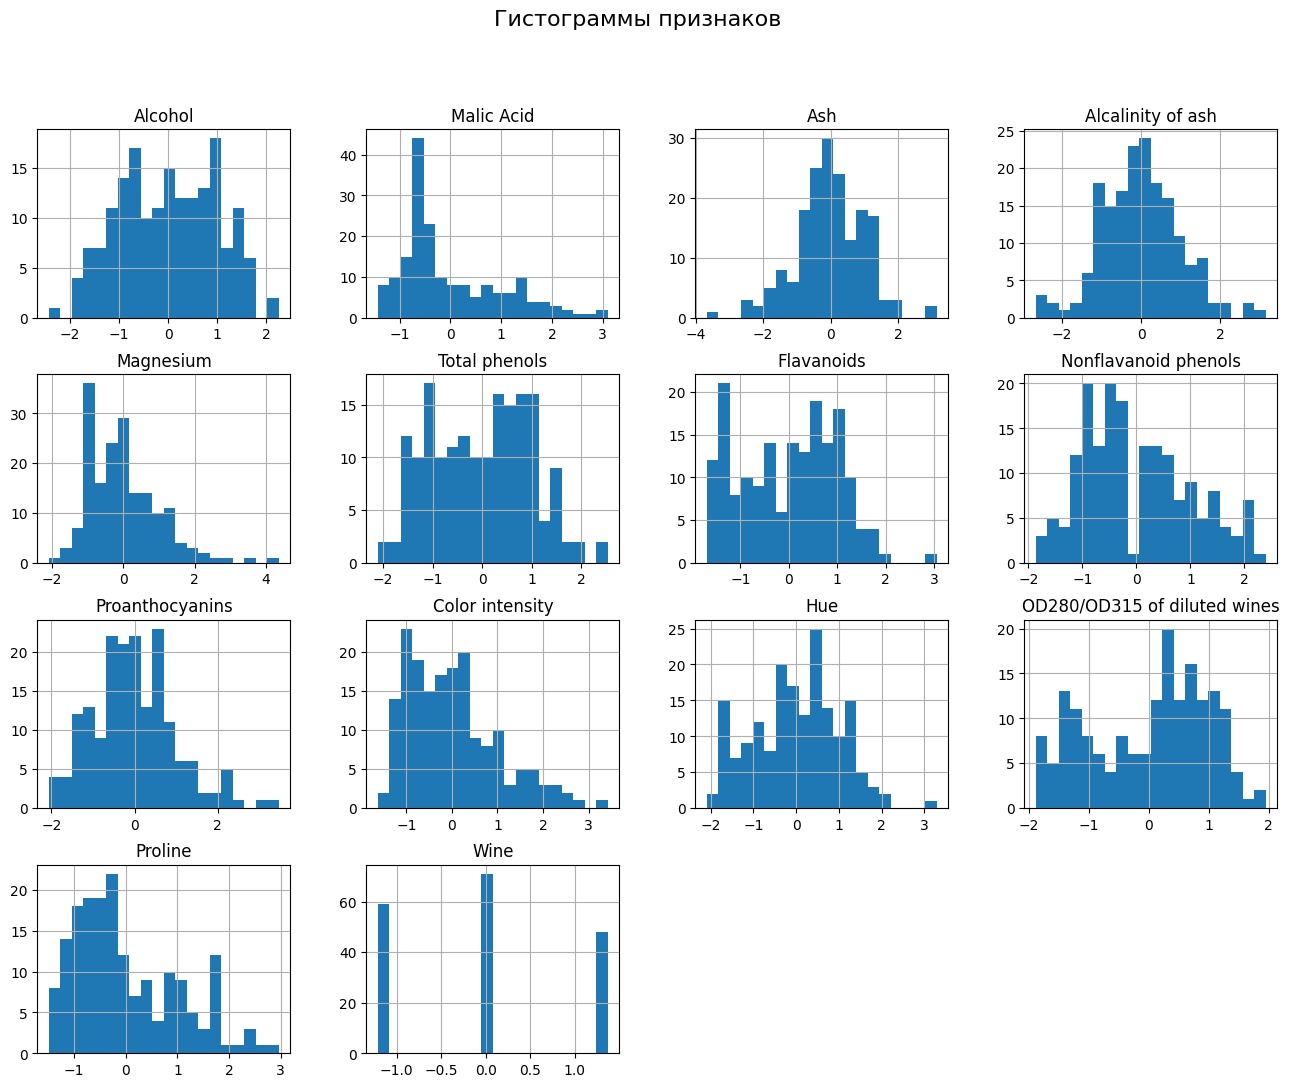

In [ ]:
df.hist(figsize=(16, 12), bins=20)
plt.suptitle('Гистограммы признаков', fontsize=16)
plt.show()

Ось X показывает значения признака, сгруппированные по интервалам.
Ось Y показывает количество наблюдений (число строк), попавших в каждый интервал.

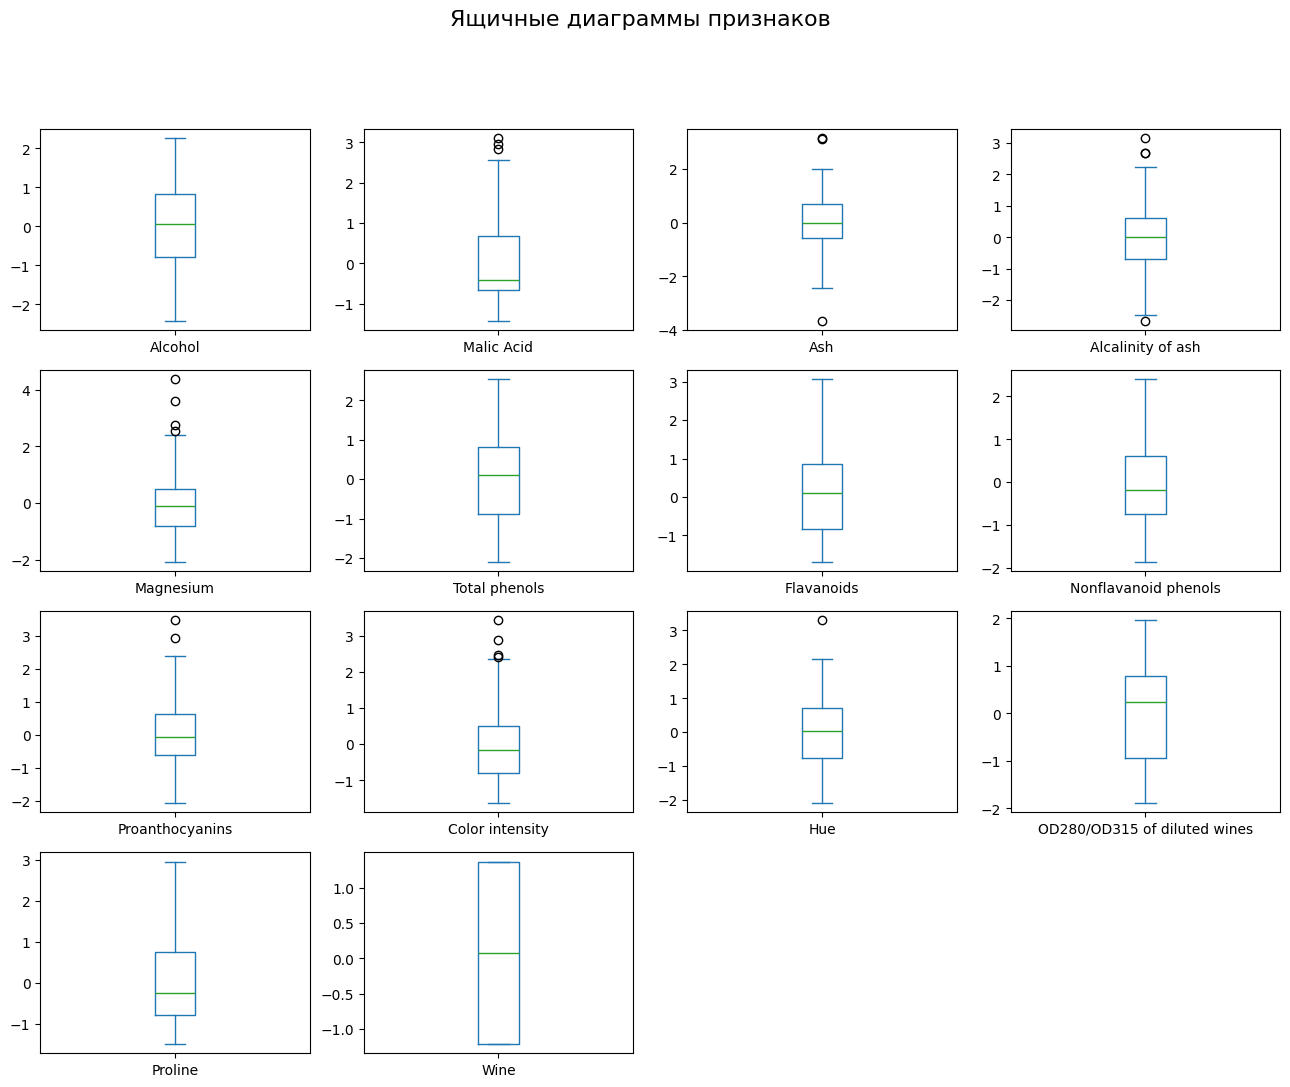

In [ ]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(16, 12), sharex=False, sharey=False)
plt.suptitle('Ящичные диаграммы признаков', fontsize=16)
plt.show()

Границы ящика (box):
- Первый квартиль (Q1, 25%): Нижняя граница ящика.
- Третий квартиль (Q3, 75%): Верхняя граница ящика.
Ящик показывает межквартильный размах (IQR) — диапазон между Q1 и Q3, который содержит центральные 50% данных.

Линия внутри ящика (медиана):
- Это медиана (Q2, 50%) — середина распределения.

"Усы":
- Усы выходят из ящика и обычно простираются до 1.5 * IQR от первого и третьего квартилей. Они показывают диапазон большинства данных.

Выбросы:
- Точки за пределами усов считаются выбросами — значениями, которые сильно отличаются от остальных данных.

### 3D-визуализация признаков

Алкоголь, Зола, Щелочность золы

Алкоголь и щелочность золы могут быть связаны через восприятие кислотности и крепости вина. Вина с высоким содержанием алкоголя могут маскировать кислотность, делая вино более мягким.

Зола и щелочность золы связаны через содержание минеральных веществ и влияние этих веществ на вкус и структуру вина.

Важность этих признаков для анализа:
- Эти признаки важны для анализа состава вина, так как они могут рассказать о стиле вина (например, легкое или крепкое, кислое или сбалансированное).
- Анализ этих данных может помочь в определении качества вина, а также в его классификации по стилям (например, красное или белое вино, сухое или полусладкое).

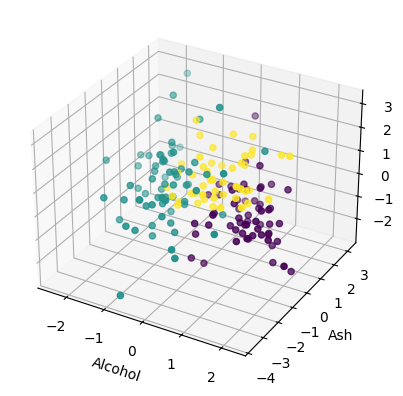

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
features = ['Alcohol', 'Ash', 'Alcalinity of ash']
ax.scatter(df[features[0]], df[features[1]], df[features[2]], c=df['Wine'])
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.show()

интенсивность цвета, оттенок и оптическая плотность — могут дать много информации о составе вина, его возрасте, типе и качестве.

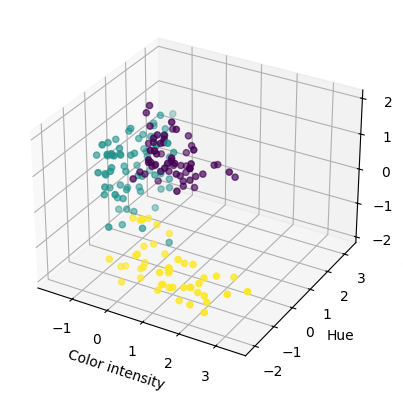

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
features = ['Color intensity', 'Hue', 'OD280/OD315 of diluted wines']
ax.scatter(df[features[0]], df[features[1]], df[features[2]], c=df['Wine'])
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.show()

## Реализация метода k-ближайших соседей (k-NN)

метрический алгоритм для автоматической классификации объектов или регрессии. ближайшим к нему объектам, значения которых уже известны.

### Нормализация

In [ ]:
df['Wine'].unique()

array([-1.21052889,  0.07973544,  1.36999976])

In [ ]:
features = df.drop(columns=['Wine'])
df[features.columns] = (features - features.min()) / (features.max() - features.min())

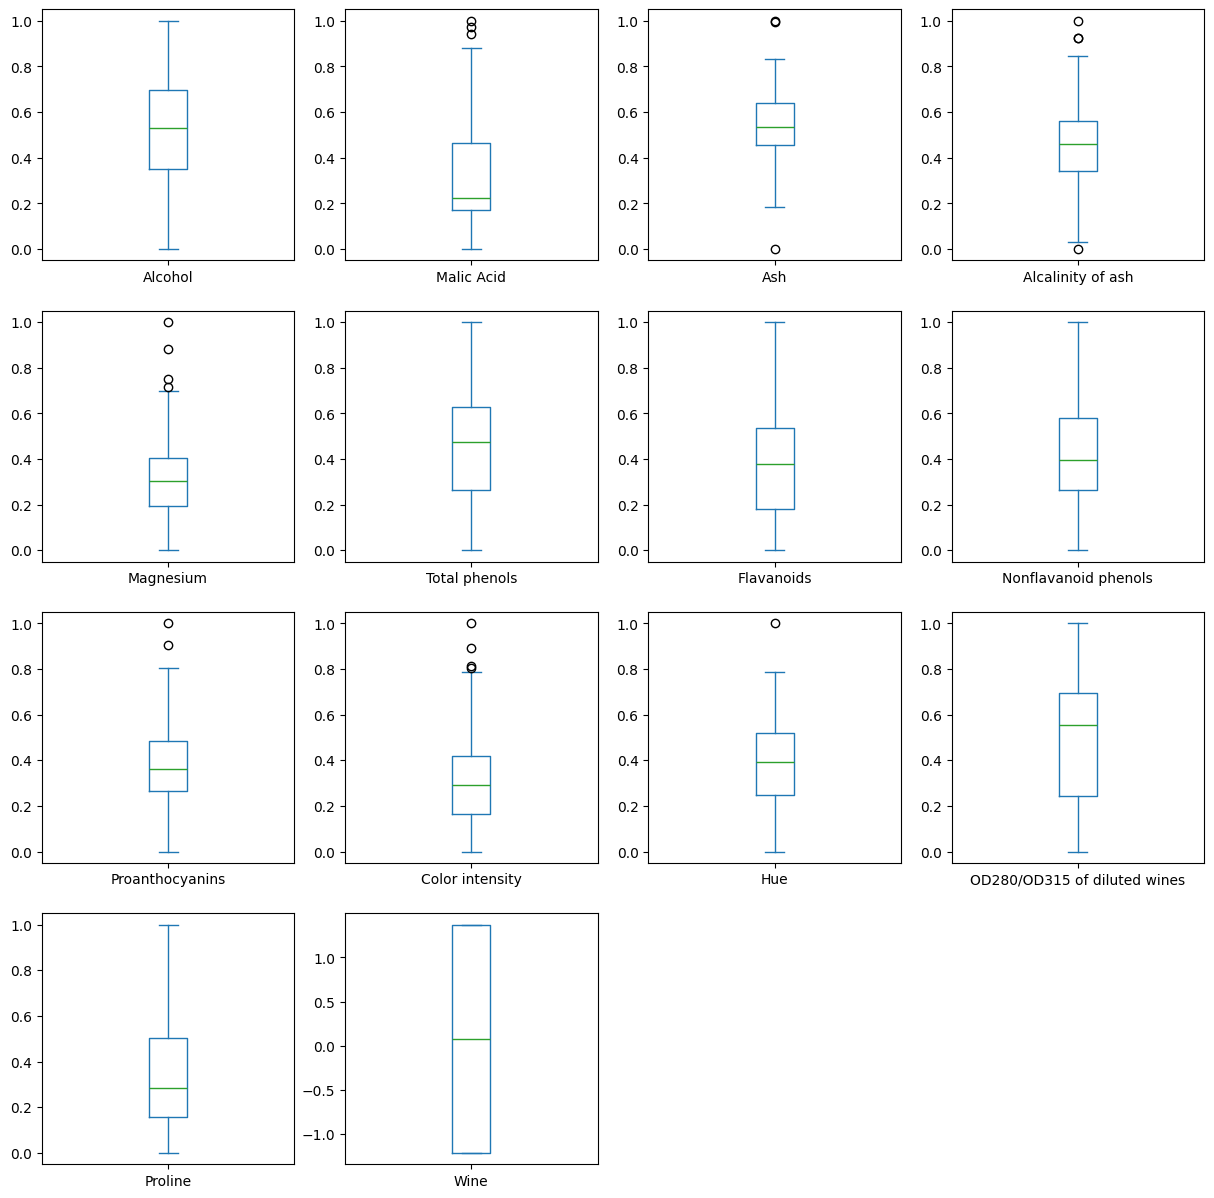

In [ ]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 15))
plt.show()

Евклидово расстояние является наиболее понятной и интерпретируемой мерой различия или близости объектов

In [ ]:
def euclidean_distance(x, y):
  return np.sqrt(np.sum((x - y) ** 2))

1 функция находит k ближайших соседей для данного тестового объекта test_row в обучающем наборе train

2 функция использует найденных соседей для предсказания класса тестового объекта test_row.

In [ ]:
def get_neighbors(train, test_row, k): # returns a list of train_rows
  distances = []
  for train_row in train:
      dist = euclidean_distance(test_row[:-1], train_row[:-1])
      distances.append((train_row, dist))
  distances.sort(key=lambda tup: tup[1]) # сортируется по расстоянию
  neighbors = [distances[i][0] for i in range(k)]
  return neighbors
def predict_classification(train, test_row, k): # return a wine type
  neighbors = get_neighbors(train, test_row, k)
  output_values = [row[-1] for row in neighbors]
  prediction = Counter(output_values).most_common(1)[0][0] # мы подсчитываем, сколько раз каждый класс встречается среди ближайших соседей.
  return prediction

## Построение моделей с различными наборами признаков

In [ ]:
import random
# Выбор случайных признаков для модели 1
random_features = random.sample(list(df.columns[:-1]), 3)
print(random_features)

# Фиксированные признаки для модели 2:
# Интенсивность цвета, Оттенок, Оптическая плотность вина
fixed_features = ['Color intensity', 'Hue', 'OD280/OD315 of diluted wines']

# Разделим на обучающий и тестовый наборы
train_data = df.sample(frac=0.8, random_state=123)
test_data = df.drop(train_data.index)

# Разделим наборы для случайных и фиксированных признаков
X_train_random = train_data[random_features + ['Wine']]
X_train_fixed = train_data[fixed_features + ['Wine']]

X_test_random = test_data[random_features + ['Wine']]
X_test_fixed = test_data[fixed_features + ['Wine']]

['Alcohol', 'Alcalinity of ash', 'Hue']


функция оценивает качество работы алгоритма k-ближайших соседей (k-NN) на тестовом наборе данных. Для каждой строки тестового набора она вычисляет предсказание с помощью модели, затем сравнивает это предсказание с истинным значением (меткой класса) и подсчитывает количество правильных предсказаний. В конце вычисляется и возвращается точность классификации.

In [ ]:
def evaluate_knn(train, test, k):
  accuracy_results = {}
  correct = 0
  for _, test_row in test.iterrows():
    prediction = predict_classification(train.values, test_row.values, k)
    if prediction == test_row['Wine']:
      correct += 1
  accuracy = correct / len(test)
  return accuracy

Пройдемся по значениям  𝑘=3,5,10,15,20  и будем рассчитывать предсказания для тестового набора

In [ ]:
k_values = [3, 5, 10, 15, 20]
for k in k_values:
  print(f"k = {k}")
  random_acc_result = evaluate_knn(X_train_random, X_test_random, k)
  print("Accuracy for random:", random_acc_result)
  fixed_acc_result = evaluate_knn(X_train_fixed, X_test_fixed, k)
  print("Accuracy for fixed:", fixed_acc_result)
  print()

k = 3
Accuracy for random: 0.8333333333333334
Accuracy for fixed: 0.8611111111111112

k = 5
Accuracy for random: 0.8333333333333334
Accuracy for fixed: 0.8611111111111112

k = 10
Accuracy for random: 0.8333333333333334
Accuracy for fixed: 0.8888888888888888

k = 15
Accuracy for random: 0.8055555555555556
Accuracy for fixed: 0.8888888888888888

k = 20
Accuracy for random: 0.8333333333333334
Accuracy for fixed: 0.8611111111111112



### Построение матрицы ошибок

матрица ошибок для классификатора k-ближайших соседей (k-NN). Она оценивает, насколько хорошо модель классифицирует различные типы вин (или другие классы), подсчитывая, сколько раз каждый класс был предсказан правильно или ошибочно.

In [ ]:
def confusion_matrix(train, test, k):
  unique_labels = df['Wine'].unique()
  matrix = pd.DataFrame(0, index=unique_labels, columns=unique_labels)

  for _, test_row in test.iterrows():
    prediction = predict_classification(train.values, test_row.values, k)
    actual = test_row['Wine']
    matrix.loc[actual, prediction] += 1

  return matrix

Выведем матрицу ошибок для значений  𝑘=3,5,10,15,20

In [ ]:
k_values = [3, 5, 10, 15, 20]
for k in k_values:
  print(f"k = {k}")
  random_conf_matrix = confusion_matrix(X_train_random, X_test_random, k)
  print("Random Confusion Matrix:\n", random_conf_matrix)
  fixed_conf_matrix = confusion_matrix(X_train_fixed, X_test_fixed, k)
  print("Fixed Confusion Matrix:\n", fixed_conf_matrix)
  print()

k = 3
Random Confusion Matrix:
            -1.210529   0.079735   1.370000
-1.210529          8          0          0
 0.079735          2         15          3
 1.370000          1          0          7
Fixed Confusion Matrix:
            -1.210529   0.079735   1.370000
-1.210529          7          1          0
 0.079735          2         16          2
 1.370000          0          0          8

k = 5
Random Confusion Matrix:
            -1.210529   0.079735   1.370000
-1.210529          8          0          0
 0.079735          2         15          3
 1.370000          1          0          7
Fixed Confusion Matrix:
            -1.210529   0.079735   1.370000
-1.210529          7          1          0
 0.079735          3         16          1
 1.370000          0          0          8

k = 10
Random Confusion Matrix:
            -1.210529   0.079735   1.370000
-1.210529          8          0          0
 0.079735          2         15          3
 1.370000          1          0   